### 압축 데이터 병합

In [1]:
import os
import pandas as pd

In [2]:
data = pd.read_csv('0822_0902_1hz.csv')

In [3]:
data

,Time,x,y,z
0,2023.08.22 15:26:18.991,-0.033353,-0.007399,-0.007402
1,2023.08.22 15:26:19.989,-0.033386,-0.007403,-0.007393
2,2023.08.22 15:26:20.987,-0.034551,-0.007400,-0.007404
3,2023.08.22 15:26:21.985,-0.033582,-0.007401,-0.007397
4,2023.08.22 15:26:22.987,-0.033846,-0.007405,-0.007406
...,...,...,...,...
1110455,2023.09.04 15:28:01.327,-0.007479,-0.006328,-0.007035
1110456,2023.09.04 15:28:02.325,-0.007446,-0.006378,-0.004523
1110457,2023.09.04 15:28:03.331,-0.007509,-0.006344,-0.005129
1110458,2023.09.04 15:28:04.333,-0.007664,-0.006430,-0.005698


### 시각화

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

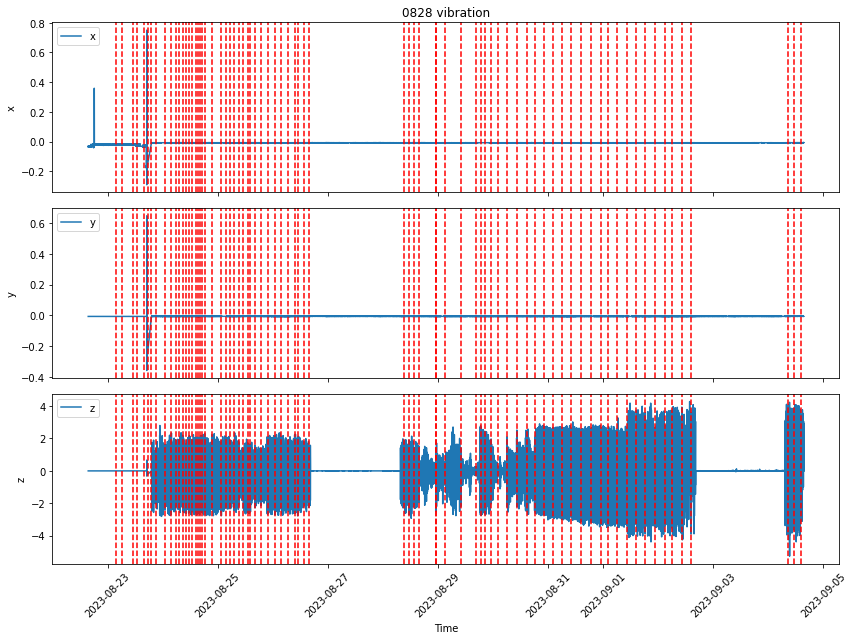

In [21]:
data['Time'] = pd.to_datetime(data['Time'], format='%Y.%m.%d %H:%M:%S.%f')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

ax1.plot(data['Time'], data['x'], label='x')
ax1.set_ylabel('x')
ax1.set_title('0828 vibration')
ax1.legend()

ax2.plot(data['Time'], data['y'], label='y')
ax2.set_ylabel('y')
ax2.legend()

ax3.plot(data['Time'], data['z'], label='z')
ax3.set_xlabel('Time')
ax3.set_ylabel('z')
ax3.legend()

red_lines = [
"2023-08-28 23:08:00","2023-09-04 14:12","2023-09-04 11:09","2023-09-04 8:42","2023-09-02 14:22","2023-09-02 10:15",
"2023-09-02 6:00","2023-09-02 2:53","2023-09-01 22:26","2023-09-01 18:24","2023-09-01 14:18","2023-09-01 10:15"
,"2023-09-01 5:54","2023-09-01 2:08","2023-08-31 23:04","2023-08-31 18:42","2023-08-31 14:20","2023-08-31 10:00"
,"2023-08-31 5:57","2023-08-31 2:13","2023-08-30 22:18","2023-08-30 18:13","2023-08-30 14:41","2023-08-30 10:24"
,"2023-08-30 6:05","2023-08-30 2:19","2023-08-29 23:08","2023-08-29 20:23","2023-08-29 18:49","2023-08-29 16:27"
,"2023-08-29 10:07","2023-08-29 3:08","2023-08-28 23:08","2023-08-28 15:42","2023-08-28 13:39","2023-08-28 11:21"
,"2023-08-28 9:17","2023-08-26 15:40","2023-08-26 13:40","2023-08-26 11:02","2023-08-26 9:27","2023-08-26 6:24"
,"2023-08-26 3:39","2023-08-26 1:06","2023-08-25 21:42","2023-08-25 18:56","2023-08-25 16:17","2023-08-25 14:08"
,"2023-08-25 13:11","2023-08-25 11:07","2023-08-25 9:11","2023-08-25 6:57","2023-08-25 5:25","2023-08-25 3:28"
,"2023-08-25 1:32","2023-08-24 21:16","2023-08-24 18:26","2023-08-24 17:00","2023-08-24 16:15","2023-08-24 15:15"
,"2023-08-24 14:15","2023-08-24 12:40","2023-08-24 11:18","2023-08-24 10:18","2023-08-24 8:35","2023-08-24 7:05"
,"2023-08-24 5:47","2023-08-24 3:35","2023-08-24 0:50","2023-08-23 21:11","2023-08-23 18:58","2023-08-23 17:28"
,"2023-08-23 15:36","2023-08-23 12:55","2023-08-23 10:46","2023-08-23 6:09","2023-08-23 3:26"
]

for line in red_lines:
    line_time = pd.to_datetime(line, format='%Y-%m-%d %H:%M:%S')
    ax1.axvline(x=line_time, color='red', linestyle='--')
    ax2.axvline(x=line_time, color='red', linestyle='--')
    ax3.axvline(x=line_time, color='red', linestyle='--')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 상관관계

In [15]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [16]:
xyz = data.iloc[:,1:]
xyz

,x,y,z
0,-0.033353,-0.007399,-0.007402
1,-0.033386,-0.007403,-0.007393
2,-0.034551,-0.007400,-0.007404
3,-0.033582,-0.007401,-0.007397
4,-0.033846,-0.007405,-0.007406
...,...,...,...
1110455,-0.007479,-0.006328,-0.007035
1110456,-0.007446,-0.006378,-0.004523
1110457,-0.007509,-0.006344,-0.005129
1110458,-0.007664,-0.006430,-0.005698


In [17]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(xyz), columns=xyz.columns)

print("\nMin-Max Scaling 결과:\n", scaled_df)


Min-Max Scaling 결과:
                 x         y         z
0        0.247107  0.349367  0.551514
1        0.247076  0.349362  0.551515
2        0.245956  0.349365  0.551514
3        0.246887  0.349365  0.551515
4        0.246634  0.349361  0.551514
...           ...       ...       ...
1110455  0.271970  0.350432  0.551553
1110456  0.272002  0.350382  0.551816
1110457  0.271942  0.350416  0.551752
1110458  0.271793  0.350331  0.551693
1110459  0.272408  0.349947  0.549761

[1110460 rows x 3 columns]


In [18]:
correlation_matrix = scaled_df.corr(method='pearson')

print("\nPearson 상관계수 행렬:\n", correlation_matrix)


Pearson 상관계수 행렬:
           x         y         z
x  1.000000  0.295876 -0.007814
y  0.295876  1.000000  0.009269
z -0.007814  0.009269  1.000000


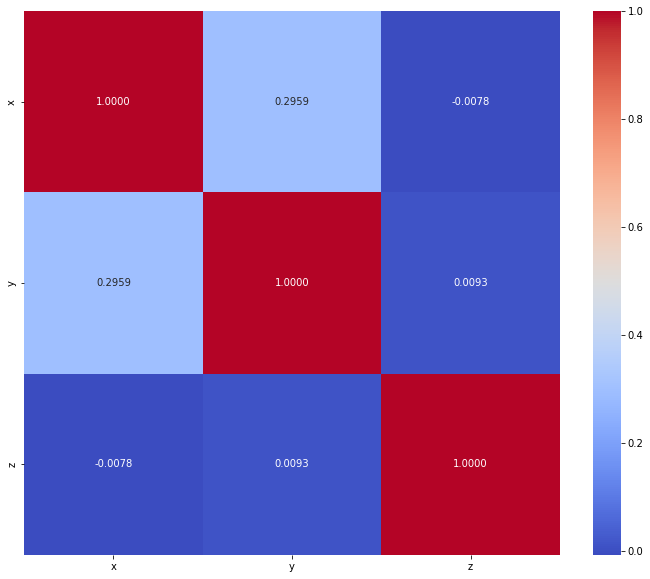

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.show()